**Import some of the standard modules from keras, numpy and sklearn**

In [1]:
import pickle
import numpy as np
import sys
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import cv2
# import the necessary packages
from keras import backend as Tensorflow
from keras.layers import Layer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
import keras
import scipy

np.set_printoptions(threshold=sys.maxsize)


Using TensorFlow backend.


*Get Training Data*

In [2]:
pickle_in = open("train_image.pkl","rb")
Train_data = pickle.load(pickle_in)
X_train = np.array(Train_data)

*Get Training Labels*

In [3]:
pickle_in = open("train_label.pkl","rb")
Train_labels = pickle.load(pickle_in)
Y_train = np.array(Train_labels)

*Get Test Data*

In [4]:
pickle_in = open("test_image.pkl","rb")
Test_data = pickle.load(pickle_in)
X_test = np.array(Test_data)



**Try out some common Data augmentation methods**<br>
1. Make mirror images (flip left-right) of the provided dataset
2. Make Water images (flip upside -down) of the provided dataset

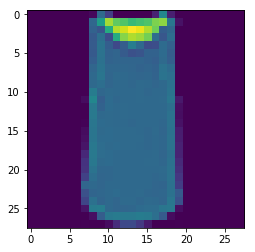

In [5]:


y=[]
x=[]

for i in  range(X_train.shape[0]):
    x.append(X_train[i])
    y.append(Y_train[i])
    
    mirror= np.fliplr(X_train[i].reshape(28,28))
    water=np.flipud(X_train[i].reshape(28,28))
    
    x.append(mirror.flatten())
    y.append(Y_train[i])
    
    x.append(water.flatten())
    y.append(Y_train[i])

    
X_train=np.array(x)
Y_train=np.array(y)





1. Normalize test data and train data.
2. Split data into train,test and validation

In [6]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)


1. Convert to "one-hot" vectors using the to_categorical function
2. Define mapping and inverse mapping for classes

In [7]:

num_classes = 4

mapping ={'0': 0, '2': 1, '3': 2, '6': 3}
invmapping = {'0':0,'1':2,'2':3 ,'3':6}


y_train=[]

for i in range(Y_train.shape[0]):
    y_train.append(mapping[str(Y_train[i])])

y_val = []  

for i in range(Y_val.shape[0]):
    y_val.append(mapping[str(Y_val[i])])
    
# print (y_train)

y_train = keras.utils.to_categorical(y_train, num_classes,dtype='float32')
y_val = keras.utils.to_categorical(y_val, num_classes,dtype='float32')



*Print necessary data shapes*

In [8]:
image_size = 784 # 28*28
num_classes = 4 # 4 unique classes
dim=28

print ("Training Shape :{}\n".format(X_train.shape), "Training Labels :{}\n".format(y_train.shape), "Validation Shape :{}\n".format(X_val.shape),"Validation Labels : {}\n".format(y_val.shape),"Test Samples: {}\n".format(X_test.shape) )

Training Shape :(19200, 784)
 Training Labels :(19200, 4)
 Validation Shape :(4800, 784)
 Validation Labels : (4800, 4)
 Test Samples: (2000, 784)



* Create Model : Add Some Conv Layers, Maxpools, Dropouts and some dense layers to model *

In [9]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))


model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
# Take a look at the model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)  

* Compile code using adam as optimiser and loss as Categorical_Crossentropy

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

* Reshape validation data to bring it into a valid 28 X 28 image

In [11]:
X_train = X_train.reshape((X_train.shape[0],28,28,1))
X_val = X_val.reshape((X_val.shape[0], 28,28,1))


* Fit the model by fixing batch size and epoch

In [12]:
history=model.fit(X_train,
         y_train,
         batch_size=64,
         epochs=15,
         validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 19200 samples, validate on 4800 samples
Epoch 1/15
19200/19200 [==============================] - 28s 1ms/step - loss: 0.7213 - acc: 0.6951 - val_loss: 0.5156 - val_acc: 0.7952
Epoch 2/15
19200/19200 [==============================] - 26s 1ms/step - loss: 0.5211 - acc: 0.7967 - val_loss: 0.4305 - val_acc: 0.8344
Epoch 3/15
19200/19200 [==============================] - 27s 1ms/step - loss: 0.4602 - acc: 0.8227 - val_loss: 0.3842 - val_acc: 0.8569
Epoch 4/15
19200/19200 [==============================] - 27s 1ms/step - loss: 0.4269 - acc: 0.8360 - val_loss: 0.3684 - val_acc: 0.8612
Epoch 5/15
19200/19200 [==============================] - 27s 1ms/step - loss: 0.4014 - acc: 0.8442 - val_loss: 0.3468 - val_acc: 0.8648
Epoch 6/15
19200/19200 [==============================] - 28s 1ms/step - loss: 0.3840 - acc: 0.8500 - val_loss: 0.3525 - val_acc: 0.8677
Epoch 7/15
19200/19200 [==============================] - 27s 1ms/step - loss: 0.

* Plot results : validation accuracy vs train accuracy

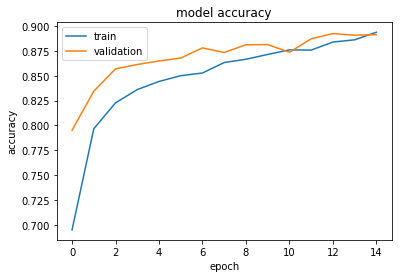

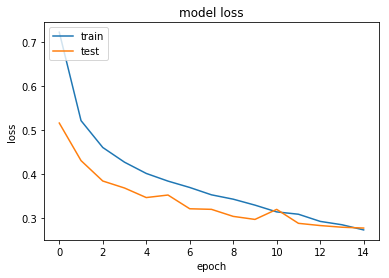

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

* Make Prediction *

In [14]:
for i in range(X_test.shape[0]):
    im = X_test[i]
    im2arr = im.reshape(1,28,28,1)
    plt.imshow(im.reshape(28,28))
    plt.show()
    y_pred = model.predict(im2arr)
    print(invmapping[str(np.argmax(y_pred))])
    print (y_pred)